آنالیز میلیاردر های جهان به زبان پایتون

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
data = pd.read_csv("Billionaire.csv")
data.head(10)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
5,Warren Buffett,$96 B,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,$93 B,United States,software,7,76.0,Technology
7,Larry Page,$91.5 B,United States,Google,8,48.0,Technology
8,Sergey Brin,$89 B,United States,Google,9,47.0,Technology
9,Mukesh Ambani,$84.5 B,India,diversified,10,63.0,Diversified


Do we have "null" values in our dataset?

In [72]:
data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

Delete this 79 person

In [73]:
data = data.dropna()

In [74]:
data.isnull().sum()

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

Delete B and $ from networth column

In [75]:
data["NetWorth"] = data["NetWorth"].str.strip("$")
data["NetWorth"] = data["NetWorth"].str.strip("B")
data["NetWorth"] = data["NetWorth"].astype(float)

In [76]:
data.head(10)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,Larry Page,91.5,United States,Google,8,48.0,Technology
8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified


## Process

In [77]:
df = data.sort_values(by=["NetWorth"], ascending=False).head(10).reset_index()
df

,index,Name,NetWorth,Country,Source,Rank,Age,Industry
0,0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
5,5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,7,Larry Page,91.5,United States,Google,8,48.0,Technology
8,8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
9,9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified


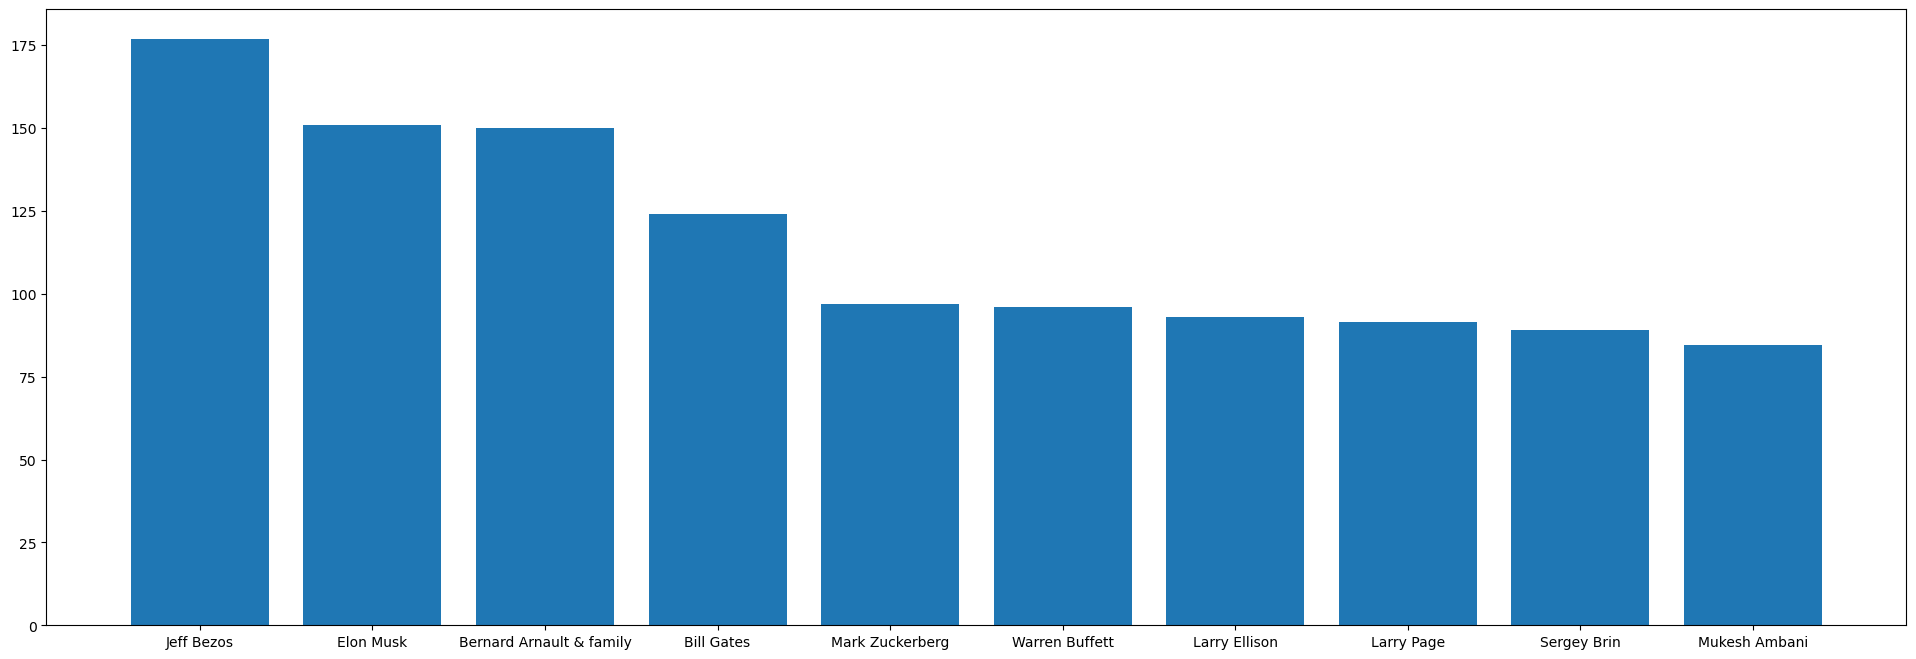

In [78]:
plt.figure(figsize=(24, 8))
plt.bar(df["Name"], df["NetWorth"])
plt.show()

In [79]:
df = data["Source"].value_counts().rename_axis('Source').to_frame('counts').head(10).reset_index()
df

,Source,counts
0,real estate,169
1,pharmaceuticals,96
2,investments,89
3,diversified,78
4,software,61
5,retail,44
6,hedge funds,42
7,private equity,35
8,consumer goods,32
9,chemicals,32


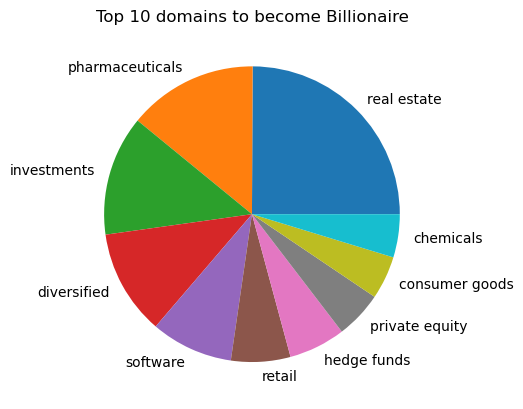

In [80]:
plt.pie(df["counts"], labels=df["Source"])
plt.title("Top 10 domains to become Billionaire")
plt.show()

In [81]:
df = data["Industry"].value_counts().rename_axis('Industry').to_frame('counts').reset_index()
df

,Industry,counts
0,Finance & Investments,365
1,Technology,355
2,Manufacturing,317
3,Fashion & Retail,268
4,Healthcare,213
5,Real Estate,211
6,Food & Beverage,204
7,Diversified,180
8,Energy,99
9,Media & Entertainment,92


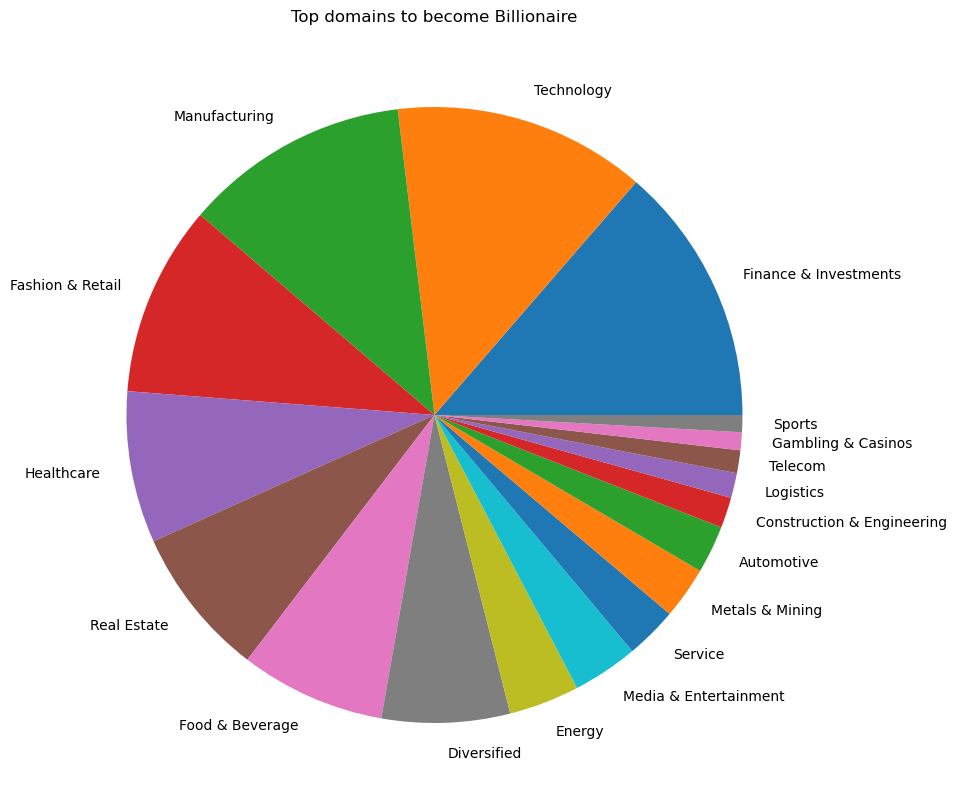

In [82]:
plt.figure(figsize=(24,10))
plt.pie(df["counts"], labels=df["Industry"])
plt.title("Top domains to become Billionaire")
plt.show()

In [83]:
df = data['Country'].value_counts().rename_axis('Country').to_frame('counts').head(10).reset_index()
df

,Country,counts
0,United States,720
1,China,610
2,India,134
3,Russia,118
4,Germany,115
5,Hong Kong,68
6,Brazil,61
7,Canada,60
8,United Kingdom,54
9,Italy,49


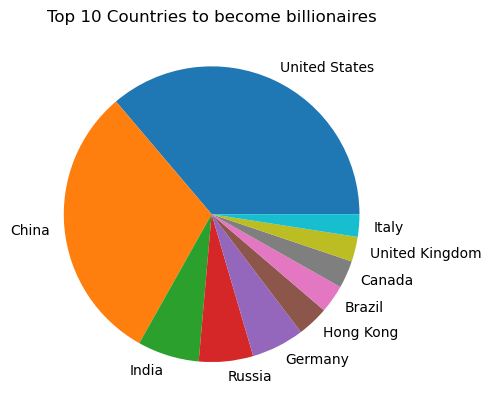

In [84]:
plt.pie(df['counts'], labels=df['Country'])
plt.title('Top 10 Countries to become billionaires')
plt.show()

# Assignment40 - Question1

### Part A: General mean and var of richest people in th world

In [85]:

df = data['Age'].mean()
print(df)

df = data['Age'].var()
print(df)

63.1136023916293
180.7721364011013


### Mean age of Billionaires in each country

In [86]:
df = data.groupby('Country')['Age'].mean().reset_index()
df

,Country,Age
0,Algeria,77.000000
1,Argentina,85.750000
2,Australia,65.302326
3,Austria,69.583333
4,Belgium,60.666667
...,...,...
65,United Kingdom,66.722222
66,United States,66.009722
67,Venezuela,61.000000
68,Vietnam,55.000000


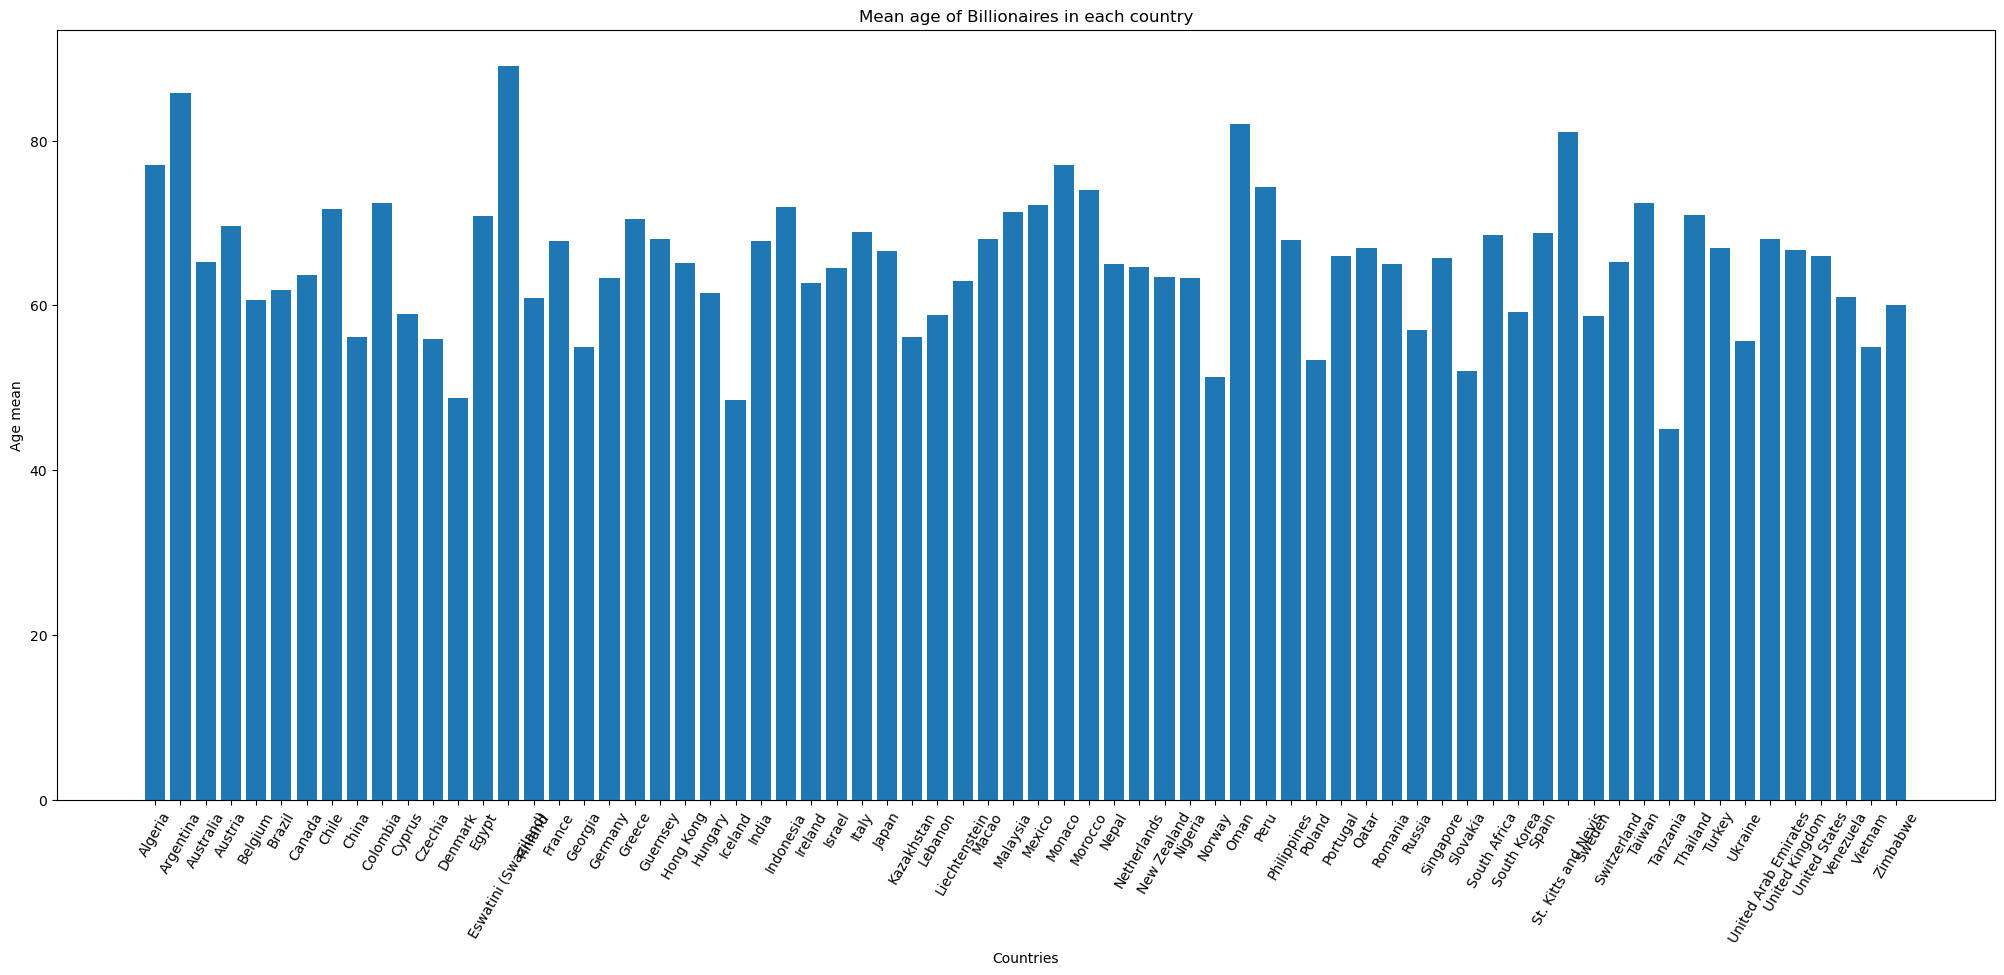

In [87]:
plt.figure(figsize=(25, 10))
plt.bar(df['Country'], df['Age'])
plt.title('Mean age of Billionaires in each country')
plt.xticks(rotation=60)
plt.xlabel('Countries')
plt.ylabel('Age mean')
plt.show()

### Variance of Billionaires age in each country

In [88]:
df = data.groupby('Country')['Age'].var().reset_index()
df

,Country,Age
0,Algeria,NaN
1,Argentina,56.250000
2,Australia,248.263566
3,Austria,208.083333
4,Belgium,158.333333
...,...,...
65,United Kingdom,165.600629
66,United States,193.355955
67,Venezuela,NaN
68,Vietnam,24.800000


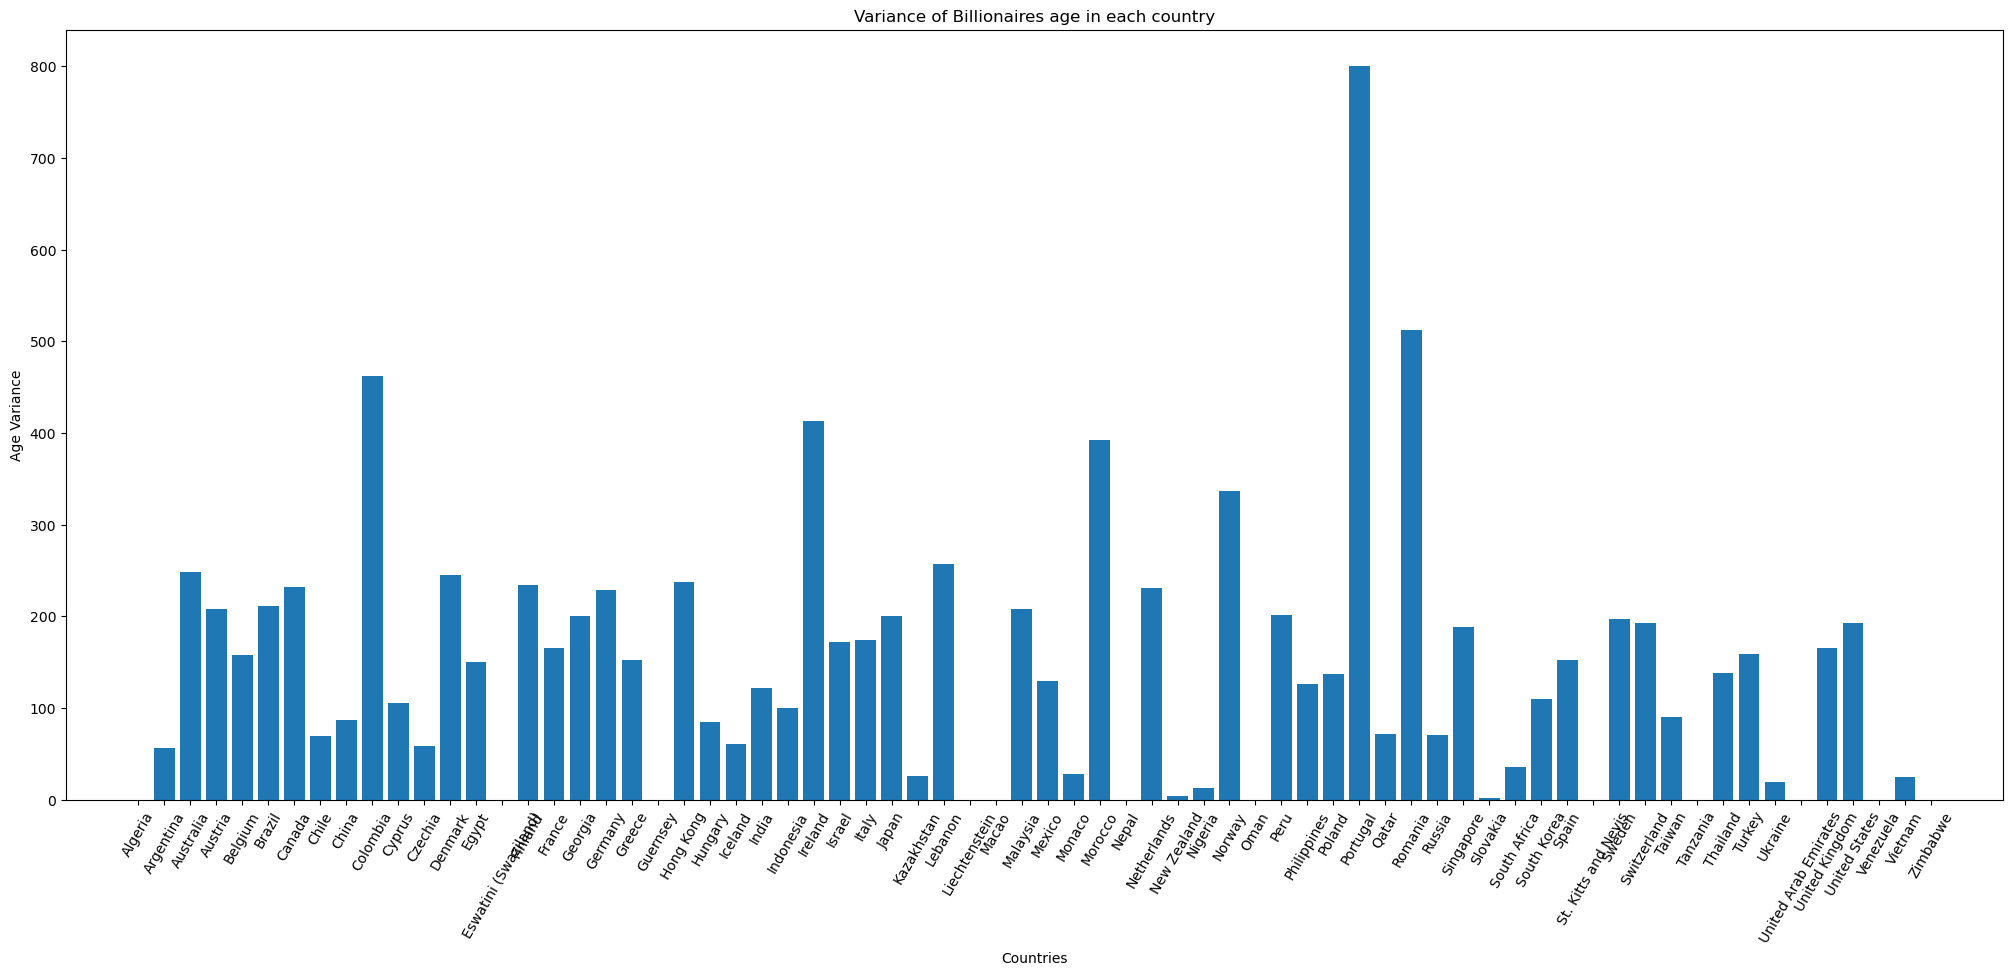

In [89]:
plt.figure(figsize=(25, 10))
plt.bar(df['Country'], df['Age'])
plt.title('Variance of Billionaires age in each country')
plt.xticks(rotation=60)
plt.xlabel('Countries')
plt.ylabel('Age Variance')
plt.show()

### Part B: Total worth of each country

In [90]:
df = data.groupby('Country')['NetWorth'].sum().reset_index()
df

,Country,NetWorth
0,Algeria,4.8
1,Argentina,9.2
2,Australia,176.7
3,Austria,62.7
4,Belgium,12.6
...,...,...
65,United Kingdom,196.5
66,United States,4384.7
67,Venezuela,3.2
68,Vietnam,16.7


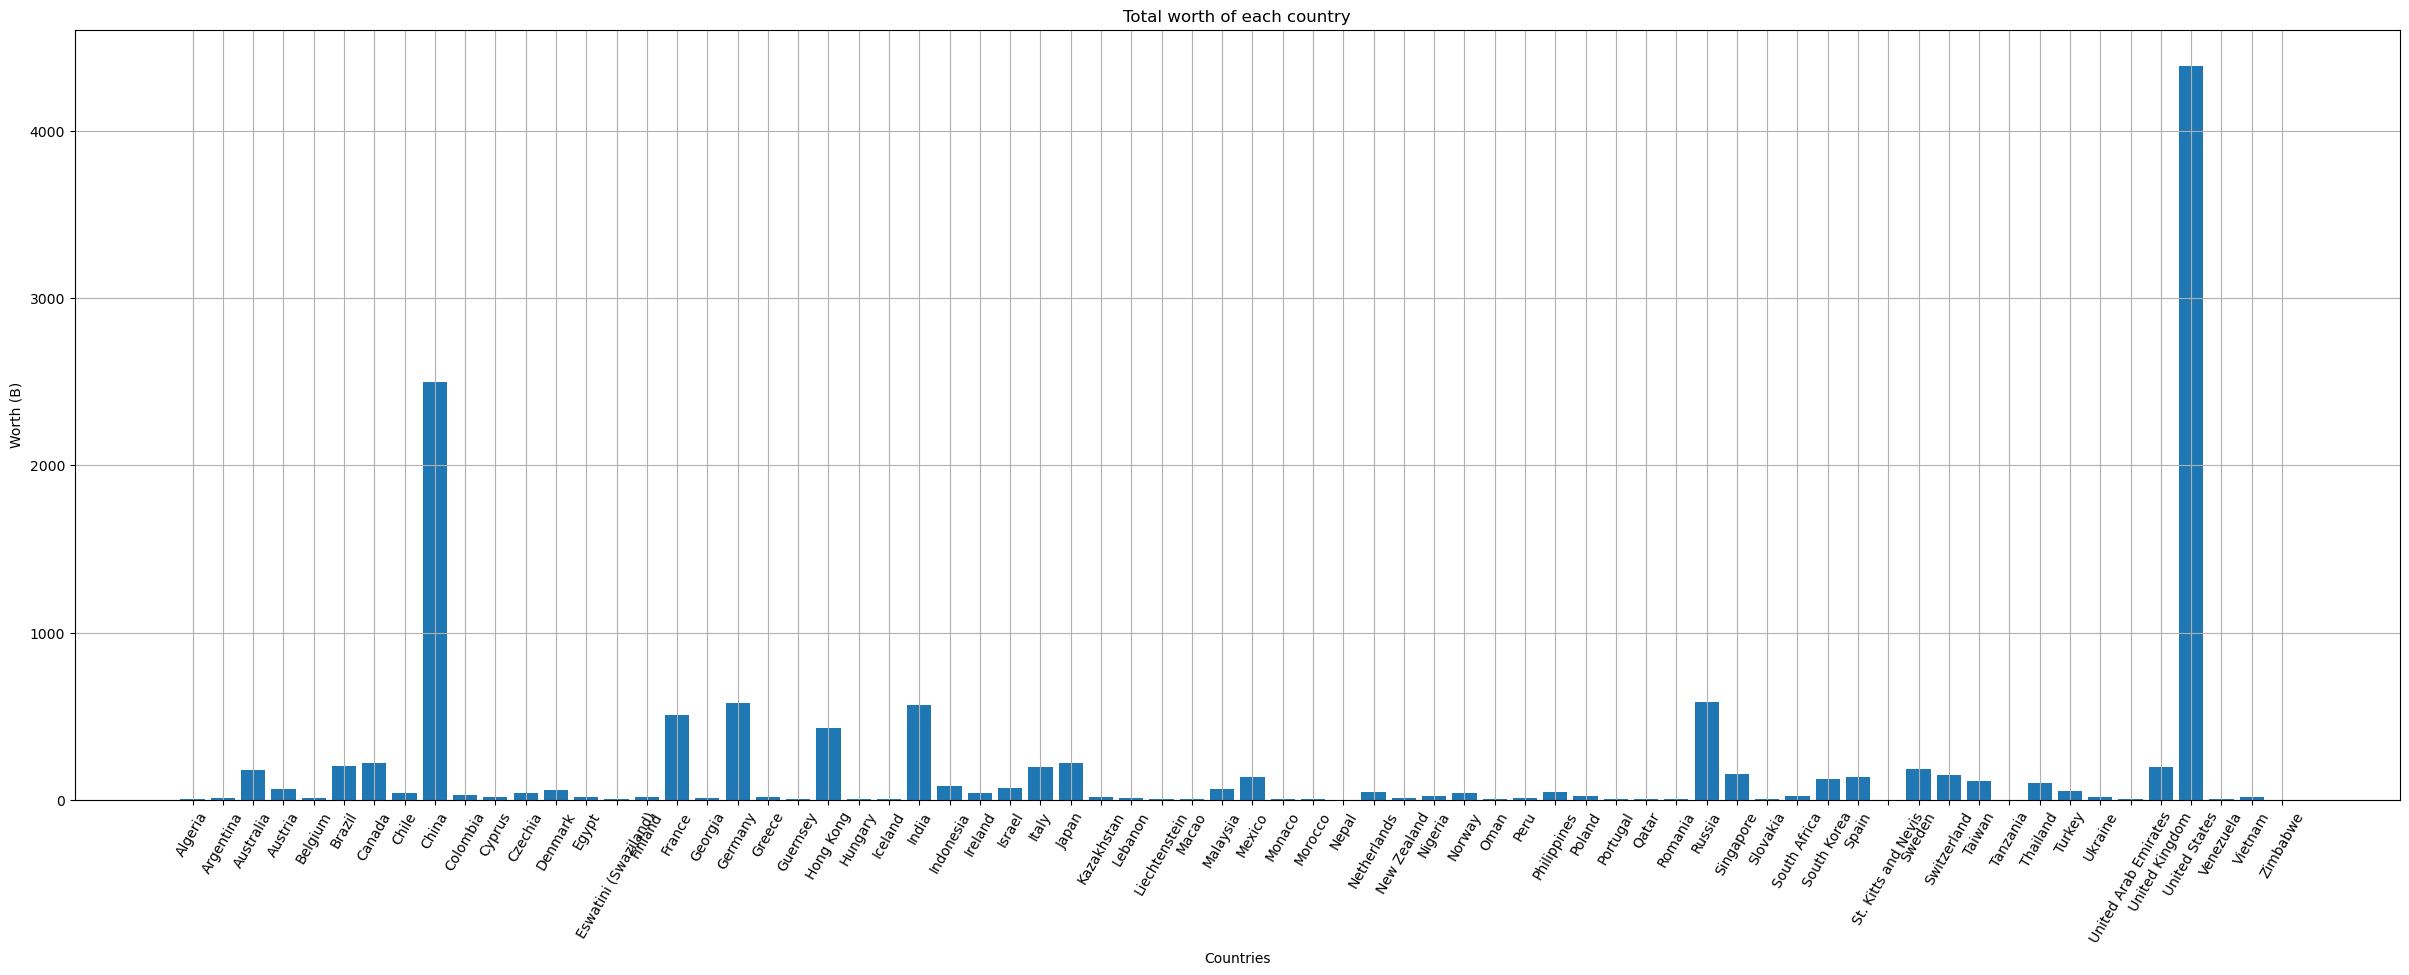

In [91]:
plt.figure(figsize=(30,10))
plt.bar(df['Country'], df['NetWorth'])
plt.title('Total worth of each country')
plt.xticks(rotation=60)
plt.xlabel('Countries')
plt.ylabel('Worth (B)')
plt.grid()
plt.show()

### Part C: Top 10 Billionaires in USA

In [92]:
df = data.query('Country == "United States"').head(10)
df

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,Larry Page,91.5,United States,Google,8,48.0,Technology
8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
13,Steve Ballmer,68.7,United States,Microsoft,14,65.0,Technology
16,Alice Walton,61.8,United States,Walmart,17,71.0,Fashion & Retail


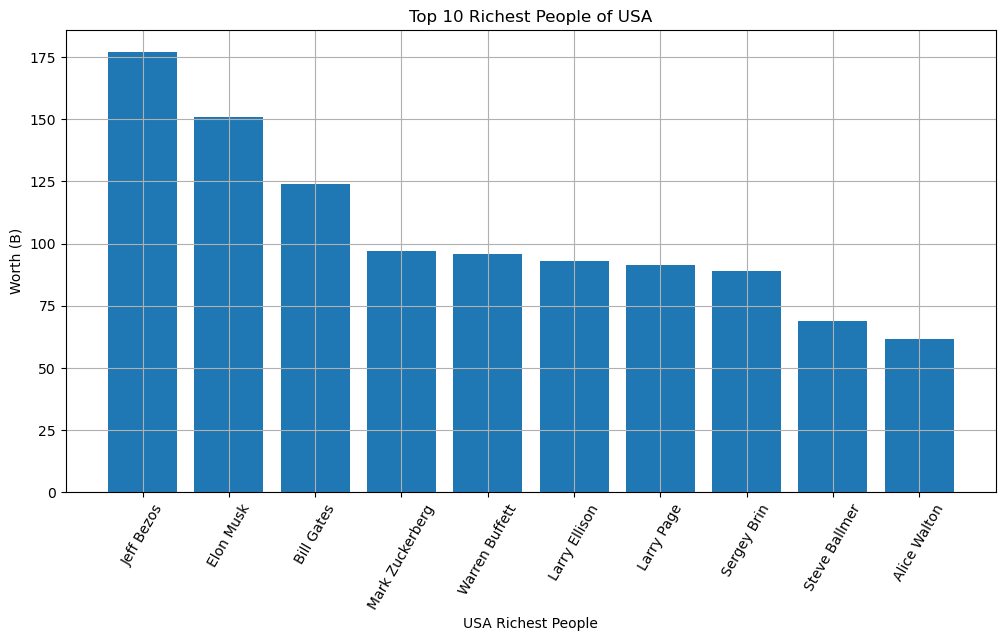

In [93]:
plt.figure(figsize=(12,6))
plt.bar(df['Name'], df['NetWorth'])
plt.title('Top 10 Richest People of USA')
plt.xticks(rotation=60)
plt.xlabel('USA Richest People')
plt.ylabel('Worth (B)')
plt.grid()
plt.show()

In [94]:
df = data['Country'].value_counts().rename_axis('Country').to_frame('Counts').tail(10).reset_index()
df

,Country,Counts
0,Tanzania,1
1,Guernsey,1
2,Oman,1
3,United Arab Emirates,1
4,Macao,1
5,Venezuela,1
6,Eswatini (Swaziland),1
7,Algeria,1
8,Liechtenstein,1
9,Nepal,1


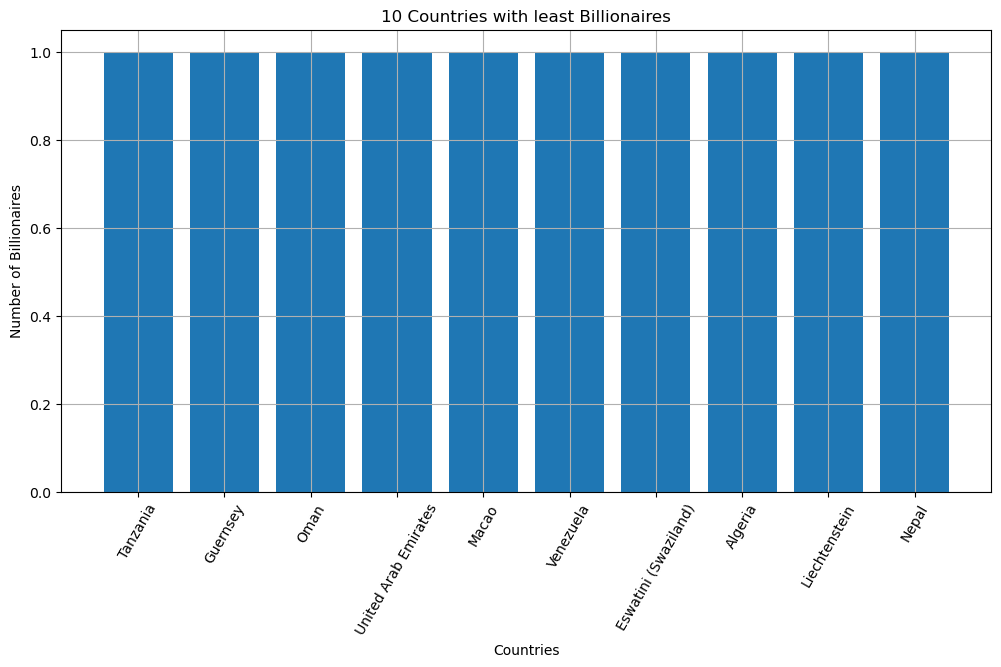

In [95]:
plt.figure(figsize=(12,6))
plt.bar(df['Country'], df['Counts'])
plt.title('10 Countries with least Billionaires')
plt.xticks(rotation=60)
plt.xlabel('Countries')
plt.ylabel('Number of Billionaires')
plt.grid()
plt.show()